#### Name: Owen Johnson 
#### Student Number: 18305971

In [3]:
import pandas as pd
import numpy as np 
import scipy
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
%matplotlib inline

In [4]:
# --- Parameters for larger plots --- 

plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["font.family"] = "Times New Roman"

# Advanced Laboratories Data Analysis Week 2 

There are two main aims to this exercise:
 1. Perform non-linear curve fitting using the **<samp>scipy.stats.curve_fit()</samp>** function.
 2. Introduce the $\chi^2$ statistic and use it to assess the quality of a fit though the reduced $\chi^2$ and $\chi^2$ probability

At the end of this session you should be able to:

1. Use the Python scipy curve_fit_ function, including providing guesses for the initial fit parameters. Usage:
```python
popt, pcov=curve_fit(func, x, y, p0=guess, sigma=yerror, absolute_sigma=True)```
2. Calculate and understand the significances of $\chi^2$, the reduced $\chi^2$ and the $\chi^2$ probability.

### Problem and Data Set
This week you will be interested in data associated with the calibration of a thermocouple. 

The data is in a file called __thermocouple.dat__ and should be downloaded to your working directory before you begin. 
 * The *first column is temperature readings in degrees C* 
 * The *second is the measured relative output voltage in mV*. The uncertainty in each of the mV readings is 0.05 mV.
 
The calibration curve is not a straight line but needs a quadratic term added to adequately describe it. In this exercise both linear and quadratic functions will be fit and the goodness of fit for each compared.

## Background 

<a id='nlfit_cell'></a>

### Non-linear curve fitting

The scipy function <samp>curve_fit()</samp> is used to perform the non-linear curve fitting.

Non-linear fitting generally using an algorithm such as the [Levenberg–Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg–Marquardt_algorithm) to find the parameters which minimise the differences between a fitted curve and the data. However, such algorithms typically only find local minima. Hence, **it is vital to give the algorithm starting values for the best-fit parameter which are close to the optimum values** (option <samp>"p0= "</samp> in <samp>curve_fit()</samp>).

Thus the procedure for performing a non-linear fit should be: 
 * plot data points
 * plot curve to be fit with initial guesses for parameters and adjust if needed until they are in right region
 * perform fit and then plot the data again with the best-fit curve overlaid

<a id='csq_cell'></a>

### $\chi^2$ and goodness of fit

$\chi^2$ is a statistic that characterises the dispersion of the observed values from the 
expected ones and is defined as: 
$$\chi^2 = \sum_{i=1}^{N}{\left(\frac{measured_i - expected_i}{error_i}\right)^2}$$

Therefore we might expect for good agreement that the measured spread would be approximately equal to the expected spread and that we should get a contribution of approximately 1 from each point. A good fit would then have $\chi^2$ approximately equal to the number of data points ($N$). In actual fact  

$$\chi^2 \approx \nu = N -n_c$$  
where $n_c$ is the number of constraints derived from the data (free parameters in the fit). $\nu$ and is known as the __number of degrees of freedom (d.o.f.)__. So we would expect the reduced $\chi^2$ ($\frac{\chi^2}{\nu}$) to be approximately 1. 

It is rare to get a value for the reduced $\chi^2$ is of exactly 1. If the value is <<1 then it means that the error bars have probably been overestimated. If it is >1 then the data and fitted curve do not agree perfectly, which can happen due to statistical fluctuations. The question: *how much > 1 can the reduced $\chi^2$ value be and still be acceptable?* depends strongly on the number of d.o.f. In general, the probability (P-value) for obtaining the observed $\chi^2$ for $\nu$ degrees of freedom within statistical flutuations can be calculated by (note: there is a different $\chi^2$ probability curve for each d.o.f.):

$$P = \int_{\chi^2_{observed}}^\infty \chi^2(x,\nu)\,dx$$

The above  $\chi^2$ P-value can be calculated in Python using the [scipy.stats.chi2.sf()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html) which is the *survival function*.
Use by:
```python
from scipy.stats import chi2
P=chi2.sf(χ2_value, ν)
```

## 1) Prepare data
<font color="blue"> Load in the data and extract the columns into appropriate variable names and make a matching numpy array for the errors on the voltages.</font>

In [5]:
from scipy.stats import chi2

In [6]:
temp_C, volt_mv = np.loadtxt("thermocouple.dat", unpack = True) # importing data 

print(temp_C, volt_mv)

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.] [-0.849 -0.738 -0.537 -0.354 -0.196 -0.019  0.262  0.413  0.734  0.882
  1.258  1.305  1.541  1.768  1.935  2.147  2.456  2.676  2.994  3.2
  3.318]


## 2) Linear fit

<font color="blue">Plot the data points with errorbars and the linear fit function (which you will have to create) with the initial guess values for the parameters</font>

In [7]:
def func(x, m, c):
    return m*x + c # defining the equation of a line. 

In [8]:
yerr = np.repeat(0.05, len(volt_mv)) # error 

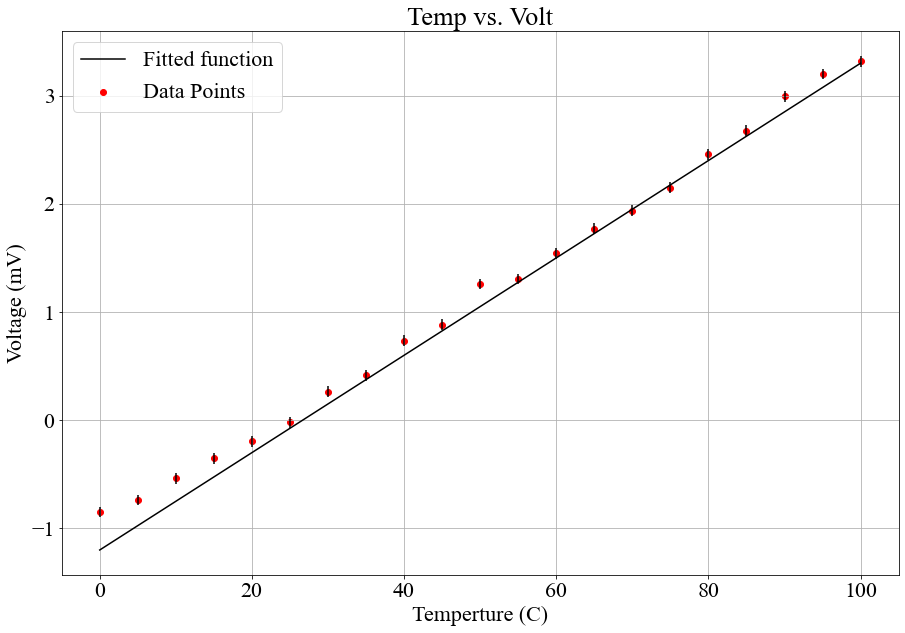

In [9]:
# --- Standard Plot --- 

plt.scatter(temp_C, volt_mv, label = "Data Points", color = 'red')
plt.plot(temp_C, func(temp_C, 0.045, -1.2), label='Fitted function', color = 'black') #contains intial data 
plt.errorbar(temp_C, volt_mv, xerr = None, yerr = yerr, ls='none', color = 'black')

plt.title("Temp vs. Volt")
plt.xlabel("Temperture (C)") 
plt.ylabel("Voltage (mV)")
plt.legend()
plt.grid()
plt.show()

<font color="blue">Use <samp>**scipy.optimize.curvefit()**</samp> to fit a straight line to the data. Give the fitting function an initial guess at the parameters (see [non-linear-fitting cell above](#nlfit_cell)). Be sure to include the y-errors in the call of the fitting function so that the fit is weighted. Plot the data with error bars, the line using the intial guess parameters (this is good practice to see that the guess is reasonable) and the line of best fit through the data. Recall,  command is **<samp>popt, pcov=curve_fit(func, x, y, p0=guess, sigma=yerror, absolute_sigma=True)</samp>** </font>

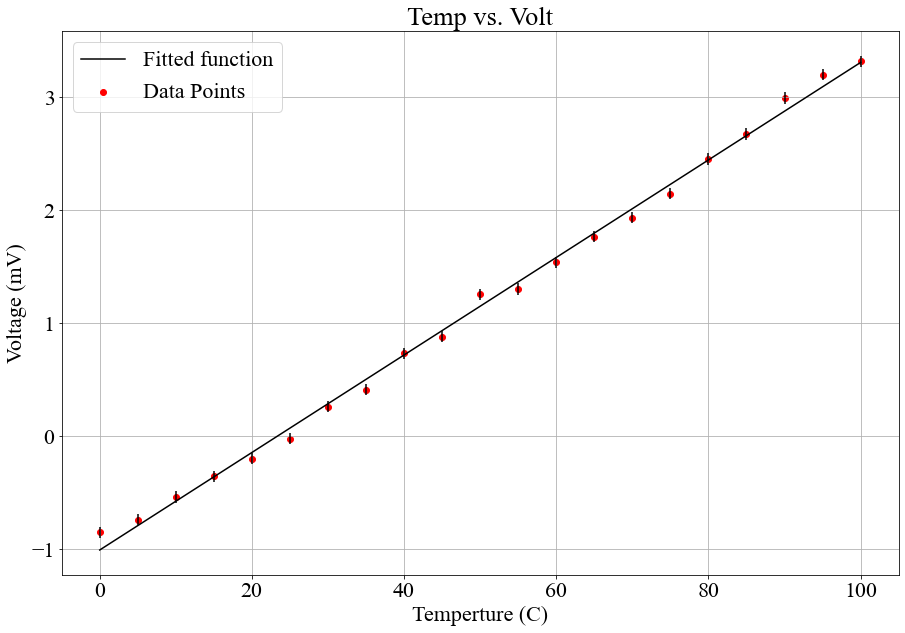

In [10]:
# --- Using Intial Guesses for Best Fit  --- 

popt1, pcov1 = curve_fit(func, temp_C, volt_mv, p0 = [0.045, -1.2], sigma = yerr, absolute_sigma = True) #parameters and covariance from intial guess. 

#--- Standard Plot --- 

plt.scatter(temp_C, volt_mv, label = "Data Points", color = 'red')
plt.plot(temp_C, func(temp_C, popt1[0], popt1[1]), label='Fitted function', color = 'black')
plt.errorbar(temp_C, volt_mv, xerr = None, yerr = yerr, ls='none', color = 'black')

plt.title("Temp vs. Volt")
plt.xlabel("Temperture (C)") 
plt.ylabel("Voltage (mV)")
plt.legend()
plt.grid()
plt.show()

## 3) Goodness of fit: linear fit

Make sure you have read and understand the [χ2 cell above](#csq_cell)

<font color="blue"> Calculate the $\chi^2$ value, reduced $\chi^2$ and $\chi^2$ P-value for the linear fit to the data. It might be useful to make your own function for calculating the $\chi^2$ sum. Do the resulting values indicate the fit is good?</font>

In [11]:
def chi(mea, expected, err): # formula for manual chi value
    return np.sum(((mea - expected)/err)**2)

def chi_red(chi, x): # defining formula from theorey section 
    nu = (len(x) - 2) 
    return chi/nu

def nu(x): 
    return (len(x) - 2)

In [12]:
# --- Calculating Chi value and P value for Linear graph --- 

chi_linear = chi(volt_mv, func(temp_C, popt1[0], popt1[1]), yerr)
chi_red_linear = chi_red(chi_linear, volt_mv)
chi_p_linear = chi2.sf(chi_linear, nu(volt_mv))

print('chi^2', chi_linear, 'chi^2 Red:', chi_red_linear, 'P-Value:', chi_p_linear)

chi^2 43.467105108225255 chi^2 Red: 2.287742374117119 P-Value: 0.0011185548731341953


The values outputted suggest a good fit. because the p << 0.05 

## 4) Try fit as quadratic polynomial

A different model for the thermocouple data might be a quadratic of the form: 

$$V = a_0 +a_1T + a_2T^2$$

<font color='blue'>Use curve_fit to fit a quadratic function to the data. Plot the data, your initial guess and the quadratic fit. </font>

In [13]:
def quad_func(T, a_0, a_1, a_2): # defining quadratic function. 
    return a_0 + a_1*T + a_2*(T**2) 

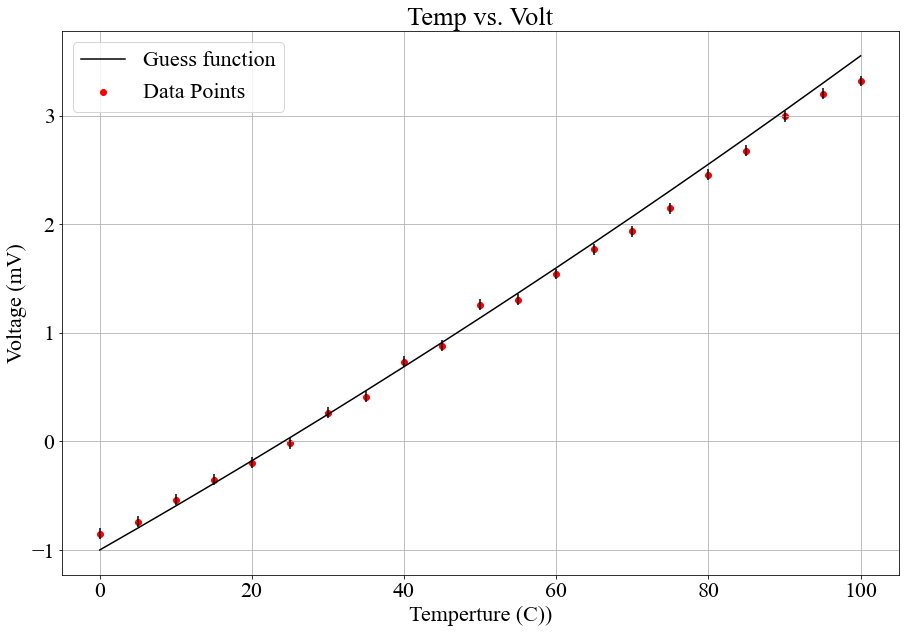

In [14]:
# --- Plotting Data --- 

plt.scatter(temp_C, volt_mv, label = "Data Points", color = 'red') # Data points 
plt.plot(temp_C, quad_func(temp_C, -1, .04, 5.5e-5), label='Guess function', color = 'black') # Intial guess fit 
plt.errorbar(temp_C, volt_mv, xerr = None, yerr = yerr, ls='none', color = 'black')

# --- Standard Plot Procedure --- 

plt.title("Temp vs. Volt")
plt.ylabel("Voltage (mV)") 
plt.xlabel("Temperture (C))")
plt.legend()
plt.grid()
plt.show()

-0.9181038941126123 0.037654326605886405 5.490088976363097e-05


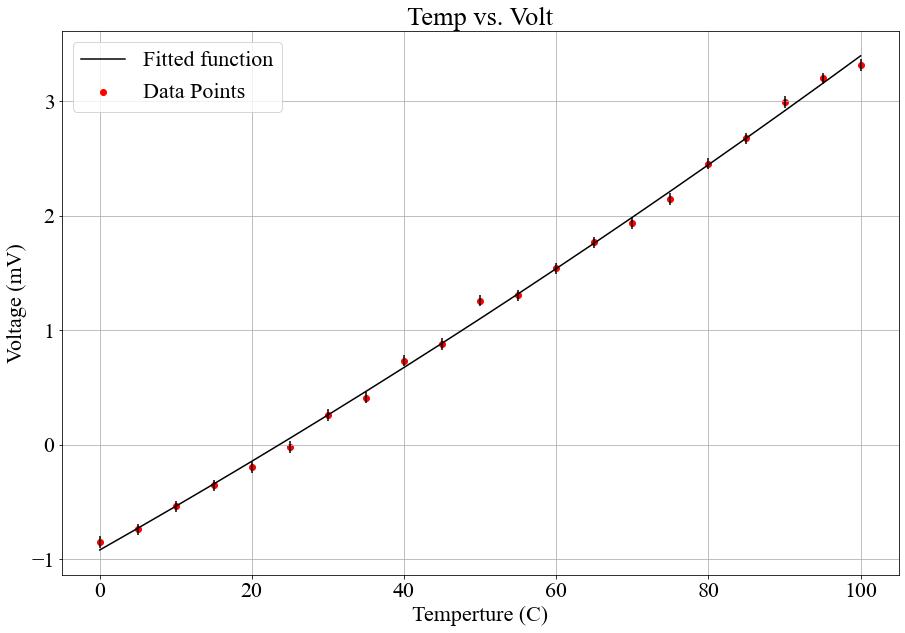

In [15]:
# --- Calculating parameters and covariance matrix based on intial guesses  --- 

poptbfq, pcovbfq = curve_fit(quad_func, temp_C, volt_mv, p0 = [23, 25, -.7], sigma = yerr, absolute_sigma = True)

print(*poptbfq)

# --- Plotting Data ---

plt.scatter(temp_C, volt_mv, label = "Data Points", color = 'red')
plt.plot(temp_C, quad_func(temp_C, poptbfq[0], poptbfq[1], poptbfq[2]), label = 'Fitted function', color = 'black')
plt.errorbar(temp_C, volt_mv, xerr = None, yerr = yerr, ls='none', color = 'black')

# --- Standard Plot Procedure --- 
plt.title("Temp vs. Volt")
plt.xlabel("Temperture (C)") 
plt.ylabel("Voltage (mV)")
plt.legend()
plt.grid()
plt.show()

<font color ="blue">Calculate a value for the reduced $\chi^2$ for this second fit and compare it with that for the first part. Which is the better fit?</font>

In [33]:
# --- Chi values for intial guesses --- 

print(scipy.stats.chisquare(volt_mv, quad_func(temp_C, poptbfq[0], poptbfq[1], poptbfq[2])))

Power_divergenceResult(statistic=0.11804840188921711, pvalue=1.0)


The fit here is better as the p value outputted is equal to 1, thus the data is unrealistically accurate or the value for the error bars are too big 

## 3) Radioactive Decay Reprise

<font color="blue">Refit the "counts.dat" data from last week, using an exponential function. You will need to be careful about the initial parameters so again plot the data, the function evaluated using the initial guess parameters and the fit. Please plot the fitted curve with 100 data points over the range so that it looks smooth. Calculate the reduced $\chi^2$ and P-value and comment on their values.</font>

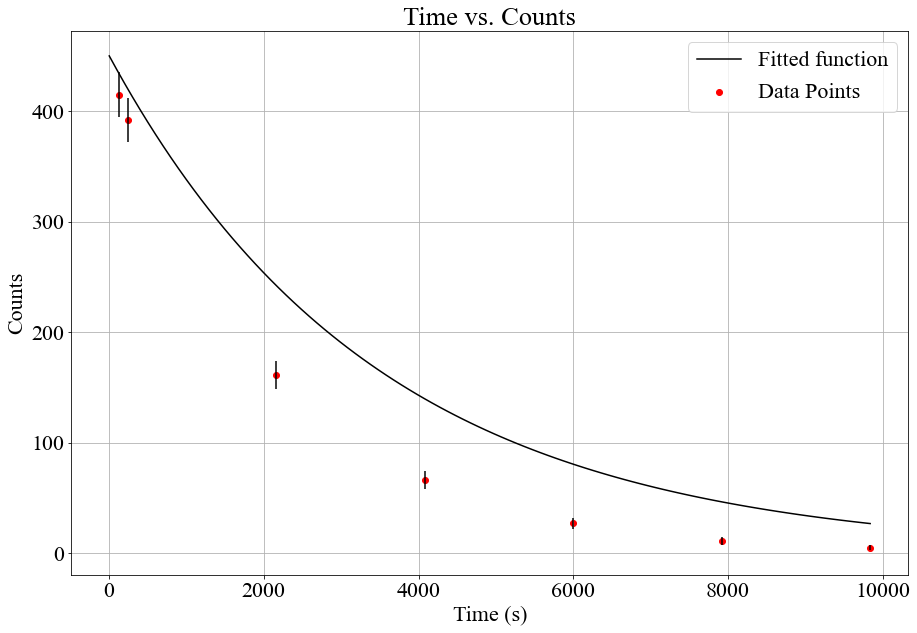

In [17]:
# --- functions --- 

def exp_func(x, a, b):
    return a*np.exp(-b*x) # defining a general exponetial function 

# --- Loading last weeks data --- 

time, counts = np.loadtxt("counts.dat", unpack = True)
yerr1 = np.sqrt(counts)

# --- Data Manpulation for Smooth fit --- 

time_s = np.linspace(0, np.amax(time), 100) # using lin space to create 100 points between 0 and the max value of time 
counts_s =  exp_func(np.linspace(0, np.amax(counts), 100), 450, 0.0068) # plugging that into function with guess parameters

# --- Plotting Data --- 

plt.scatter(time, counts, label = "Data Points", color = 'red')
plt.plot(time_s, counts_s, label='Fitted function', color = 'black')
plt.errorbar(time, counts, xerr = None, yerr = yerr1, ls='none', color = 'black')

# --- Standard Plot Procedure --- 

plt.title("Time vs. Counts")
plt.ylabel("Counts") 
plt.xlabel("Time (s)")
plt.legend()
plt.grid()
plt.show()

438.2416103503614 0.00046325451300953884


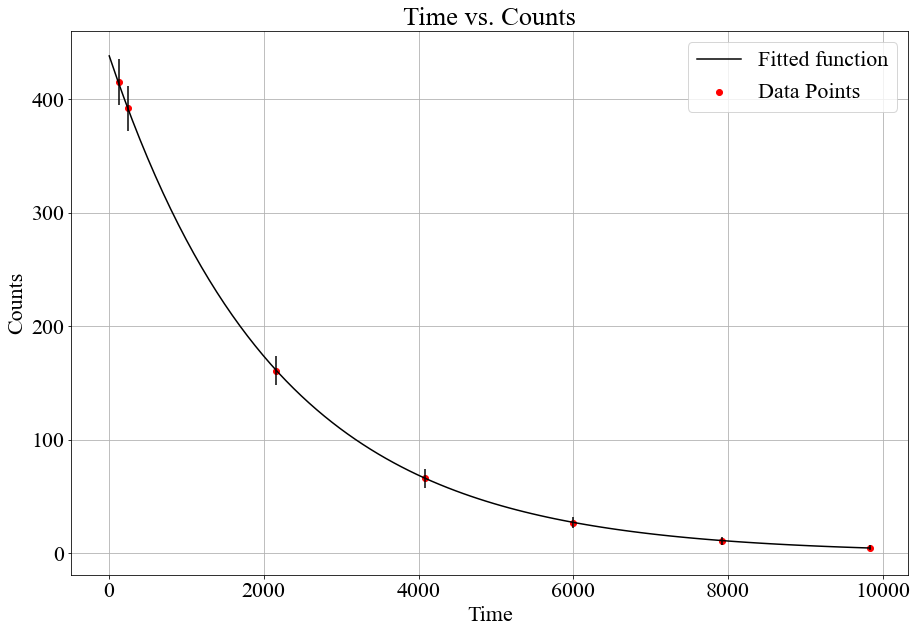

In [18]:
# --- Calculating parameters and covariance matrix based on intial guesses  --- 

poptbfe, pcovbfe = curve_fit(exp_func, time, counts, p0 = [500, 0.005], sigma = yerr1, absolute_sigma = True)

print(*poptbfe)

# --- Plotting Data --- 

plt.scatter(time, counts, label = "Data Points", color = 'red')
plt.plot(time_s, exp_func(time_s, poptbfe[0], poptbfe[1]), label='Fitted function', color = 'black')
plt.errorbar(time, counts, xerr = None, yerr = yerr1, ls='none', color = 'black')

# --- Standard Plot Procedure ---

plt.title("Time vs. Counts")
plt.ylabel("Counts") 
plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()

In [30]:
# --- Chi values for intial guesses --- 

print(scipy.stats.chisquare(counts, exp_func(time, 500, 0.005)))

# --- Chi values for best fit function --- 

print(scipy.stats.chisquare(counts, exp_func(time, poptbfe[0], poptbfe[1])))

Power_divergenceResult(statistic=1.165201174058538e+20, pvalue=0.0)
Power_divergenceResult(statistic=0.04172597727388125, pvalue=0.9999985099997132)


Again this is considered a good fit due to the p value being close to one. Thus the data provided is good and the error bars adequate. 

## 4) Concluding Remarks:

Now you should be able to:
1. Use _scipy optimize.curvefit_ to do least squares fitting to arbitrary functions. 
2. Appreciate the importance of weighted a fit to experimental data buy the uncertainty in the points & be able to use
_scipy optimize.curvefit_ to carry out such a fit.
3. Understand the significance of $\chi^2$, the reduced $\chi^2$, and the $\chi^2$ P-value.